In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from tensorflow.keras import  datasets,layers,models

In [20]:
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

In [21]:
train_images.shape


(50000, 32, 32, 3)

In [22]:
test_images.shape

(10000, 32, 32, 3)

In [23]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [24]:
train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [25]:
train_images[0].shape

(32, 32, 3)

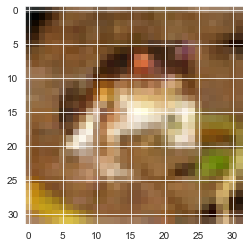

In [26]:
plt.imshow(train_images[0])

In [27]:
train_labels[0]

array([6], dtype=uint8)

In [28]:
train_labels[34]

array([4], dtype=uint8)

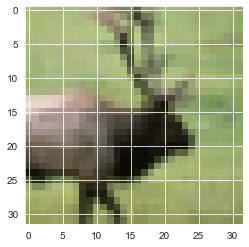

In [29]:
plt.imshow(train_images[34])

In [30]:
class_names =['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

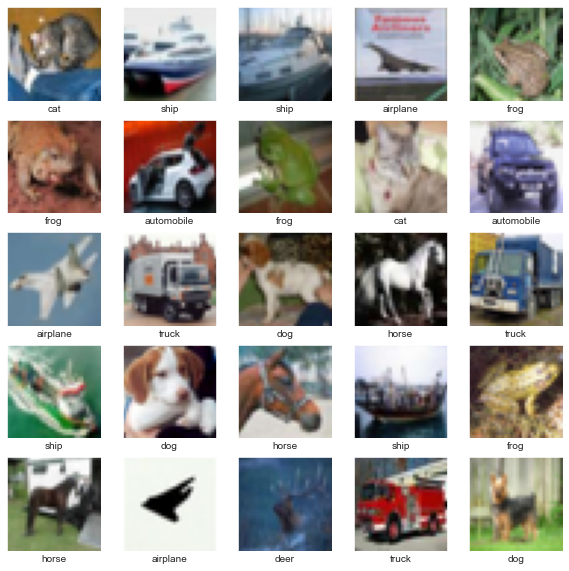

In [31]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i][0]])
plt.show()    

In [32]:
class_names[test_labels[2][0]]

'ship'

In [33]:
test_labels[2]

array([8], dtype=uint8)

In [34]:
train_images,test_images = train_images /255.0,test_images /255.0

In [35]:
train_images[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [36]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation ='relu',input_shape = (32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation ='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation ='relu'))
model.summary()            

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [38]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [39]:
history = model.fit(train_images,train_labels,epochs=6,validation_data=(test_images,test_labels))

Epoch 1/6


C:\Users\sagar\.conda\envs\deepl\lib\site-packages\keras\backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1563/1563 [==============================] - 27s 17ms/step - loss: 1.5611 - accuracy: 0.4316 - val_loss: 1.2717 - val_accuracy: 0.5397
Epoch 2/6
1563/1563 [==============================] - 27s 17ms/step - loss: 1.1819 - accuracy: 0.5781 - val_loss: 1.0871 - val_accuracy: 0.6163
Epoch 3/6
1563/1563 [==============================] - 26s 17ms/step - loss: 1.0261 - accuracy: 0.6373 - val_loss: 1.0055 - val_accuracy: 0.6476
Epoch 4/6
1563/1563 [==============================] - 26s 17ms/step - loss: 0.9320 - accuracy: 0.6726 - val_loss: 0.9354 - val_accuracy: 0.6745
Epoch 5/6
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8605 - accuracy: 0.6969 - val_loss: 0.9138 - val_accuracy: 0.6795
Epoch 6/6
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8028 - accuracy: 0.7189 - val_loss: 0.8934 - val_accuracy: 0.6925


In [47]:
history.history

{'loss': [1.561086893081665,
  1.181858777999878,
  1.0261330604553223,
  0.9319934248924255,
  0.8605298399925232,
  0.8027843236923218],
 'accuracy': [0.4316200017929077,
  0.57805997133255,
  0.6373000144958496,
  0.6725999712944031,
  0.6969000101089478,
  0.7188599705696106],
 'val_loss': [1.27169668674469,
  1.0871052742004395,
  1.0054881572723389,
  0.9353981614112854,
  0.9138171672821045,
  0.8933529257774353],
 'val_accuracy': [0.5396999716758728,
  0.6162999868392944,
  0.647599995136261,
  0.6744999885559082,
  0.6794999837875366,
  0.6924999952316284]}

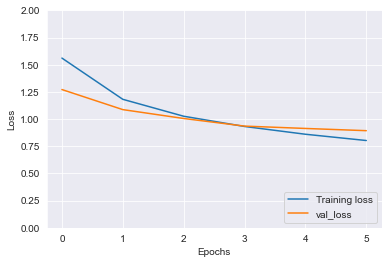

In [48]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0,2])
plt.legend(loc='lower right')
plt.show()


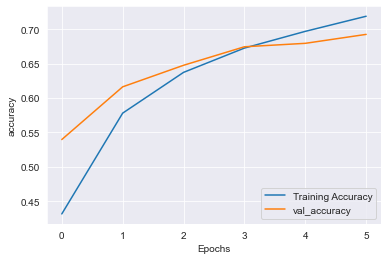

In [49]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
#plt.ylim([0,2])

plt.legend(loc='lower right')
plt.show()

In [50]:
test_loss,test_acc = model.evaluate(test_images,test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.8934 - accuracy: 0.6925


In [51]:
test_labels[100]

array([4], dtype=uint8)

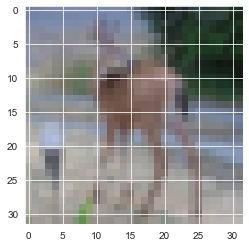

In [52]:
plt.imshow(test_images[100])

In [54]:
model.predict(test_images[100].reshape(1,32,32,3)).round(2)

array([[0.  , 0.  , 0.02, 0.02, 0.34, 0.1 , 0.  , 0.51, 0.  , 0.  ]],
      dtype=float32)

In [55]:
np.argmax(model.predict(test_images[100].reshape(1,32,32,3)).round(2))

7

In [64]:
class_names[np.argmax(model.predict(test_images[100].reshape(1,32,32,3)))]

'horse'

In [56]:
test_labels[45]

array([9], dtype=uint8)

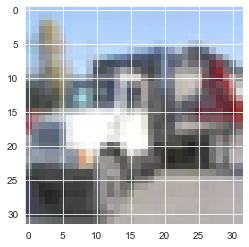

In [58]:
plt.imshow(test_images[45])

In [61]:
model.predict(test_images[45].reshape(1,32,32,3)).round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [62]:
np.argmax(model.predict(test_images[45].reshape(1,32,32,3)).round(2))

9

In [63]:
class_names[np.argmax(model.predict(test_images[45].reshape(1,32,32,3)))]

'truck'

In [66]:
test_labels[70]

array([2], dtype=uint8)

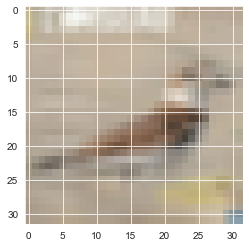

In [67]:
plt.imshow(test_images[70])

In [68]:
model.predict(test_images[70].reshape(1,32,32,3)).round(2)

array([[0.22, 0.  , 0.6 , 0.06, 0.05, 0.02, 0.01, 0.  , 0.04, 0.  ]],
      dtype=float32)